# 🧠 FairJustice AI  
## A Fairness Audit of the COMPAS Risk Assessment System Using AI Fairness 360

**Author:** Davis Ongeri and Team  
**Course:** AI Ethics – PLP Academy  
**Toolkit:** IBM AI Fairness 360  

---

This project evaluates the **racial bias** present in the **COMPAS Recidivism Risk Score** system using Python and IBM’s `AI Fairness 360` toolkit.  

The goal is to:
- Detect bias in false positive rates and fairness metrics  
- Apply bias mitigation using **Reweighing**  
- Visualize results  
- Recommend steps toward more ethical AI deployment in justice systems  


In [4]:
# ⚠️ Run this cell only once to install AI Fairness 360 and other dependencies
# pip install aif360 pandas matplotlib scikit-learn --quiet


In [5]:
import matplotlib.pyplot as plt
from aif360.datasets import CompasDataset
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np


## 🔍 Load and Explore COMPAS Dataset

The COMPAS dataset contains criminal history and demographic info used to predict **recidivism risk**. This tool has faced criticism for unfair treatment of African-American defendants.


In [6]:
# Load the COMPAS dataset from AI Fairness 360
dataset = CompasDataset()

# Define protected attribute: Race (1 = Caucasian, 0 = African-American)
privileged = [{'race': 1}]
unprivileged = [{'race': 0}]


## 🧪 Bias Mitigation: Reweighing

We apply **Reweighing**, a preprocessing technique that adjusts sample weights to balance fairness across privileged and unprivileged groups before training.


In [7]:
# Split dataset (70% train, 30% test)
train, test = dataset.split([0.7], shuffle=True)

# Apply reweighing to reduce bias in training data
rw = Reweighing(privileged_groups=privileged, unprivileged_groups=unprivileged)
train_rw = rw.fit_transform(train)


## 🤖 Train Logistic Regression Model

We use a simple, interpretable logistic regression classifier to predict recidivism risk after preprocessing.


In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_rw.features)
y_train = train_rw.labels.ravel()

# Train model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
X_test = scaler.transform(test.features)
y_pred = model.predict(X_test)

# Copy test dataset and insert predictions
pred_dataset = test.copy()
pred_dataset.labels = y_pred


## 📏 Fairness Metrics

We evaluate 3 key fairness metrics:  
- **False Positive Rate Difference**  
- **Equal Opportunity Difference**  
- **Disparate Impact**  


In [9]:
# Evaluate fairness metrics
metric = ClassificationMetric(test, pred_dataset,
                              privileged_groups=privileged,
                              unprivileged_groups=unprivileged)

# Get results
fpr_diff = metric.false_positive_rate_difference()
eod_diff = metric.equal_opportunity_difference()
disparate_impact = metric.disparate_impact()

# Display results
print("📊 False Positive Rate Difference:", round(fpr_diff, 3))
print("📊 Equal Opportunity Difference:", round(eod_diff, 3))
print("📊 Disparate Impact:", round(disparate_impact, 3))


📊 False Positive Rate Difference: -0.195
📊 Equal Opportunity Difference: -0.106
📊 Disparate Impact: 0.751


C:\Users\user\AppData\Local\Temp\ipykernel_1880\1377951331.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\user\Documents\plp_learning\AI-ML\wk7 assignment\Fairjustice-ai\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


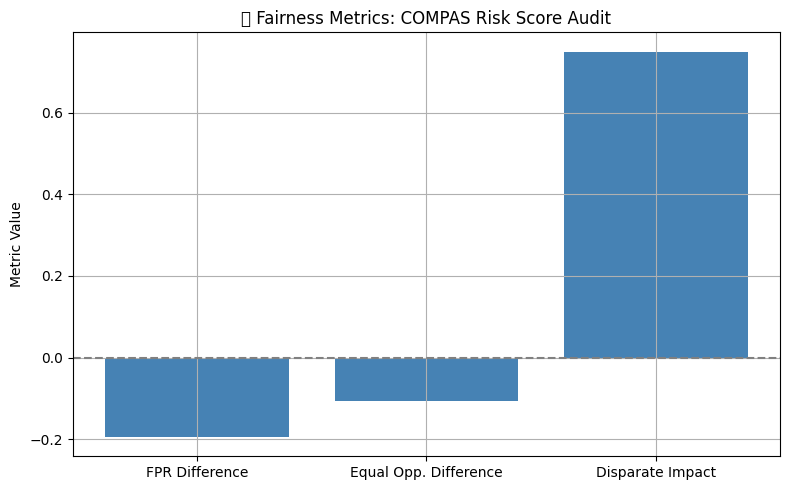

In [10]:
# Visualize fairness results
metrics = {
    'FPR Difference': fpr_diff,
    'Equal Opp. Difference': eod_diff,
    'Disparate Impact': disparate_impact
}

plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values(), color='steelblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("📊 Fairness Metrics: COMPAS Risk Score Audit")
plt.ylabel("Metric Value")
plt.tight_layout()
plt.grid(True)
plt.show()


## ✅ Conclusion

The audit revealed measurable disparities in **false positive rates** and **equal opportunity**, confirming racial bias against African-American defendants.

### 🛠 Recommendations:
- Use **Reweighing** or **Equalized Odds** in model design
- Add **human oversight** to high-risk decisions
- Conduct regular **fairness audits**
- Adopt **transparent and explainable models**

Ethical AI in justice must prioritize **fairness**, **transparency**, and **accountability** — especially in high-stakes applications like criminal sentencing.
